In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

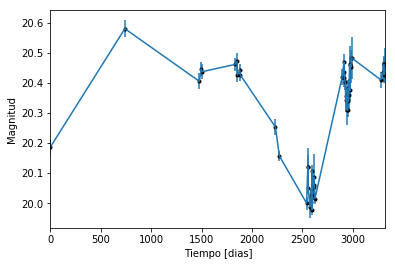

In [2]:
data = np.genfromtxt('LC_19055_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

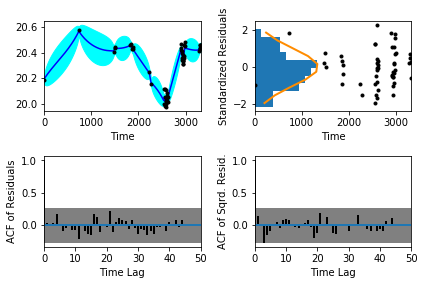

In [5]:
sample.assess_fit()

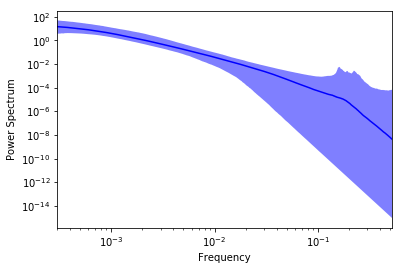

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0973304,'Medida del nivel de ruido')

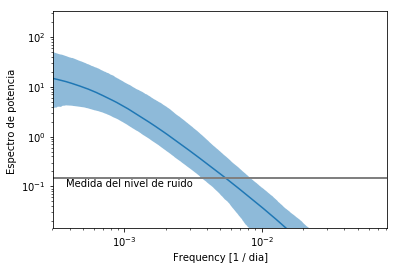

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

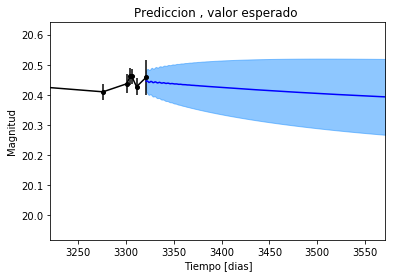

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

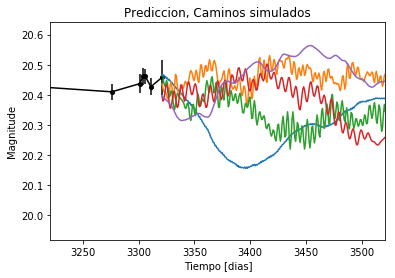

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


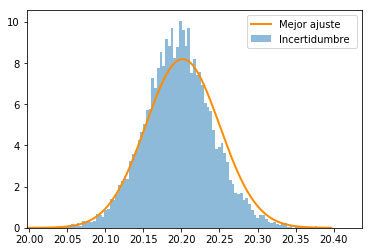

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

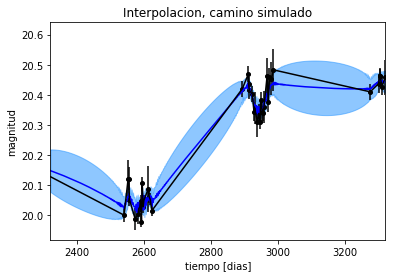

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

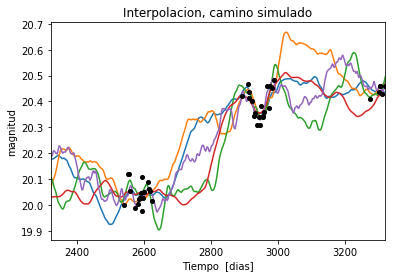

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 569.059934448
Median: 0.0156579861904
Standard deviation: 0.205601594242
68% credibility interval: [ 0.00136356  0.20287534]
95% credibility interval: [  3.95202516e-04   8.02455723e-01]
99% credibility interval: [  3.14310320e-04   9.82228410e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 710.969101453
Median: 0.00663460429672
Standard deviation: 0.0939435942015
68% credibility interval: [ 0.00063145  0.04772908]
95% credibility interval: [  3.29472195e-04   3.29806168e-01]
99% credibility interval: [  3.08289023e-04   6.28068562e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 119.069426352
Median: 0.0657230539746

In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 130.14920511
Median: 0.177845102456
Standard deviation: 0.26526630274
68% credibility interval: [ 0.          0.57416975]
95% credibility interval: [ 0.          0.88047103]
99% credibility interval: [ 0.          1.00309767]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 130.14920511
Median: 0.177845102456
Standard deviation: 0.26526630274
68% credibility interval: [ 0.          0.57416975]
95% credibility interval: [ 0.          0.88047103]
99% credibility interval: [ 0.          1.00309767]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1378.91529093
Median: 0.0
Standard deviation: 0.000212583343551
68% credibil

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 178.548110233
Median: 98.7105202808
Standard deviation: 2.1988669651
68% credibility interval: [  96.55197886  100.83909631]
95% credibility interval: [  93.65931075  102.35591171]
99% credibility interval: [  91.61843025  103.12413745]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 153.325848017
Median: 1.08613136004
Standard deviation: 2.53698994545
68% credibility interval: [ 0.16657453  5.13218642]
95% credibility interval: [ 0.03840691  8.55815074]
99% credibility interval: [  0.0142603   11.06626865]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 199.047810024
Median: 2.3303320305
Standard deviation: 10.2075580909
68% credibility interval: [  0.39569626  16.60585362]
95% credibility interval: [  8.49317649e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 987.432228655
Median: 6.48396045008e-48
Standard deviation: 1.29060015516e+29
68% credibility interval: [  1.11742787e-119   6.90113168e-008]
95% credibility interval: [  5.12649508e-177   3.15828152e+026]
99% credibility interval: [  7.58070089e-210   1.93782650e+029]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2115.62755805
Median: 20.3440794883
Standard deviation: 0.0845713512356
68% credibility interval: [ 20.26721786  20.42259234]
95% credibility interval: [ 20.17613165  20.50891684]
99% credibility interval: [ 20.10087952  20.58317455]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 130.14920511
Median: 0.177845102456
Standard deviation: 0.26526630274
68% credibility interval: [ 0.          0.57416975]
95% credibility interval: [ 0.          0.88047103]
99% credibility interval: [ 0.          1.00309767]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 130.14920511
Median: 0.177845102456
Standard deviation: 0.26526630274
68% credibility interval: [ 0.          0.57416975]
95% credibility interval: [ 0.          0.88047103]
99% credibility interval: [ 0.          1.00309767]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1378.91529093
Median: 0.0
Standard deviation: 0.000212583343551
68% credibil

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 178.548110233
Median: 98.7105202808
Standard deviation: 2.1988669651
68% credibility interval: [  96.55197886  100.83909631]
95% credibility interval: [  93.65931075  102.35591171]
99% credibility interval: [  91.61843025  103.12413745]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1287.84261559
Median: 0.0318680896077
Standard deviation: 0.0235759535999
68% credibility interval: [ 0.02019749  0.05085004]
95% credibility interval: [ 0.013909    0.09453601]
99% credibility interval: [ 0.01097808  0.15528478]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 364.861605613
Median: 1.1095693486
Standard deviation: 0.229438760882
68% credibility interval: [ 0.9001993   1.35557437]
95% credibility interval: [ 0.72584104  1.61758514]
99% credibility interval: [ 0.64568718  1.79852807]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 349.738986084
Median: 0.00665702302494
Standard deviation: 0.267674476116
68% credibility interval: [ 0.00013996  0.11387936]
95% credibility interval: [  1.25106629e-28   7.85505444e-01]
99% credibility interval: [  5.61380692e-31   1.84668853e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 569.059934448
Median: (-0.0983820287718+0j)
Standard deviation: 2.10873871324
68% credibility interval: [-1.27470333-0.52628418j -0.00856752-1.06780525j]
95% credibility interval: [ -5.04197801e+00+0.j          -2.48313064e-03-4.97155768j]
99% credibility interval: [ -6.17152312e+00+0.j          -1.97486998e-03-0.06564875j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 710.969101453
Median: (-0.0416864482361+0.673449964958j)
Standard deviation: 1.76815142469
68% credibility interval: [-0.29989067+0.93598573j -0.00396751+0.j        ]
95% credibility interval: [ -2.07223327e+00+4.55455668j  -2.07013486e-03+0.j        ]
99% credibility interval: [ -3.94627116e+00+3.40233333j  -1.93703706e-03+0.53544591j]
Posterior summa